In [1]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Set style
plt.style.use("ggplot")
sns.set(rc={"figure.figsize":(12,6)})

In [3]:
#Load dataset
df = pd.read_csv("Tyre_data.csv")

In [4]:
#Quick look
print("shape:", df.shape)
print("columns:", df.columns.tolist())
df.head()

shape: (6552, 14)
columns: ['YEAR', 'State', 'Vehicle_Class', 'Fleet_Size', 'New_Tyres_Sold', 'ELT_Generated', 'Recycling_Rate', 'Tyre_Wear_Tonnes', 'Tyre_microplastics_to_air_tonnes', 'Tyre_microplastics_to_water_tonnes', 'PM25_Share_Percent_From_Tyres', 'CO2_From_Tyre_Production_Tonnes', 'Health_Risk_Index_1to5', 'Urbanization_Index']


,YEAR,State,Vehicle_Class,Fleet_Size,New_Tyres_Sold,ELT_Generated,Recycling_Rate,Tyre_Wear_Tonnes,Tyre_microplastics_to_air_tonnes,Tyre_microplastics_to_water_tonnes,PM25_Share_Percent_From_Tyres,CO2_From_Tyre_Production_Tonnes,Health_Risk_Index_1to5,Urbanization_Index
0,2000,Andaman and Nicobar,Two Wheeler,271986,149592,142113,0.1,257.027,3.936,176.711,4.90,16455.2,1.88,0.404
1,2000,Andaman and Nicobar,Car,121569,66863,63520,0.1,287.206,4.205,197.460,4.69,7354.9,1.84,0.404
2,2000,Andaman and Nicobar,Auto-Rickshaw,51809,28495,27070,0.1,73.440,0.990,50.491,4.31,3134.5,1.77,0.404
3,2000,Andaman and Nicobar,LCV,29885,16437,15615,0.1,98.843,1.742,67.957,5.64,1808.0,2.01,0.404
4,2000,Andaman and Nicobar,Truck/Bus,47689,26229,24918,0.1,281.663,3.382,193.649,3.84,2885.2,1.69,0.404


In [5]:
df.tail()

,YEAR,State,Vehicle_Class,Fleet_Size,New_Tyres_Sold,ELT_Generated,Recycling_Rate,Tyre_Wear_Tonnes,Tyre_microplastics_to_air_tonnes,Tyre_microplastics_to_water_tonnes,PM25_Share_Percent_From_Tyres,CO2_From_Tyre_Production_Tonnes,Health_Risk_Index_1to5,Urbanization_Index
6547,2025,West Bengal,Auto-Rickshaw,540596,324357,308139,0.95,338.667,13.885,150.802,7.39,29192.2,3.65,0.808
6548,2025,West Bengal,LCV,856909,514145,488438,0.95,1252.600,55.864,557.759,8.04,46273.1,3.89,0.808
6549,2025,West Bengal,Truck/Bus,763160,457896,435001,0.95,1992.071,88.902,887.032,8.05,41210.6,3.89,0.808
6550,2025,West Bengal,Tractor/Agri,258562,155137,147380,0.95,323.963,13.945,144.255,7.76,13962.4,3.79,0.808
6551,2025,West Bengal,Others,228307,136984,130135,0.95,190.704,7.347,84.917,6.94,12328.6,3.49,0.808


In [6]:
# Basic summary stats
print(df.describe(include="all").transpose())

                                     count unique          top freq  \
YEAR                                6552.0    NaN          NaN  NaN   
State                                 6552     35        Assam  364   
Vehicle_Class                         6552      7  Two Wheeler  936   
Fleet_Size                          6552.0    NaN          NaN  NaN   
New_Tyres_Sold                      6552.0    NaN          NaN  NaN   
ELT_Generated                       6552.0    NaN          NaN  NaN   
Recycling_Rate                      6552.0    NaN          NaN  NaN   
Tyre_Wear_Tonnes                    6552.0    NaN          NaN  NaN   
Tyre_microplastics_to_air_tonnes    6552.0    NaN          NaN  NaN   
Tyre_microplastics_to_water_tonnes  6552.0    NaN          NaN  NaN   
PM25_Share_Percent_From_Tyres       6552.0    NaN          NaN  NaN   
CO2_From_Tyre_Production_Tonnes     6552.0    NaN          NaN  NaN   
Health_Risk_Index_1to5              6552.0    NaN          NaN  NaN   
Urbani

In [7]:
#Checking missing values
print(df.isnull().sum())

YEAR                                  0
State                                 0
Vehicle_Class                         0
Fleet_Size                            0
New_Tyres_Sold                        0
ELT_Generated                         0
Recycling_Rate                        0
Tyre_Wear_Tonnes                      0
Tyre_microplastics_to_air_tonnes      0
Tyre_microplastics_to_water_tonnes    0
PM25_Share_Percent_From_Tyres         0
CO2_From_Tyre_Production_Tonnes       0
Health_Risk_Index_1to5                0
Urbanization_Index                    0
dtype: int64


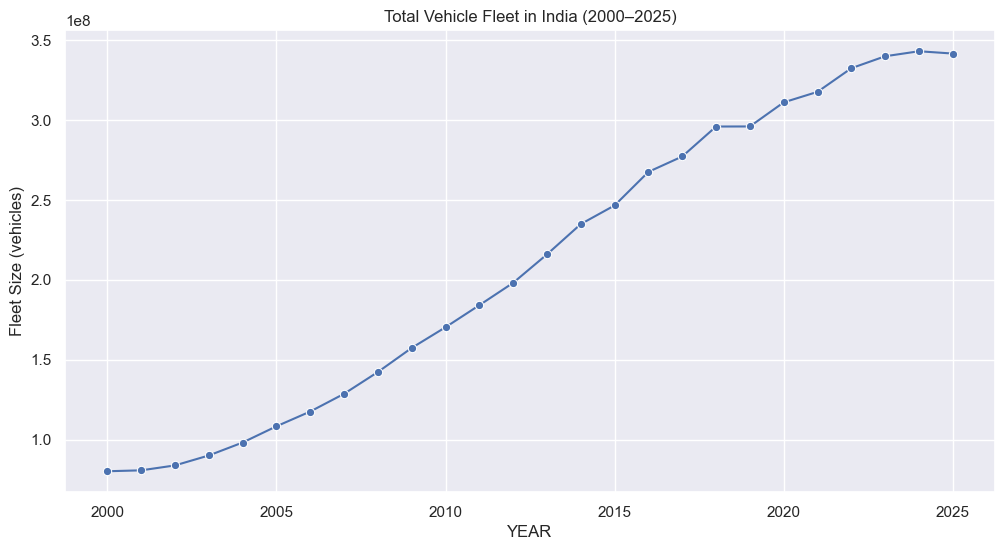

In [8]:
#Natonal Trends over time (2000 - 2025)

#Aggregate across states & vehicle classes
national = df.groupby("YEAR").agg({
    "Fleet_Size":"sum",
    "New_Tyres_Sold":"sum",
    "Tyre_Wear_Tonnes":"sum",
    "Tyre_microplastics_to_air_tonnes":"sum",
    "Tyre_microplastics_to_water_tonnes":"sum",
    "CO2_From_Tyre_Production_Tonnes":"sum"
}).reset_index()

# Plot fleet growth
plt.figure(figsize=(12,6))
sns.lineplot(data=national, x="YEAR", y="Fleet_Size", marker="o")
plt.title("Total Vehicle Fleet in India (2000–2025)")
plt.ylabel("Fleet Size (vehicles)")
plt.show()

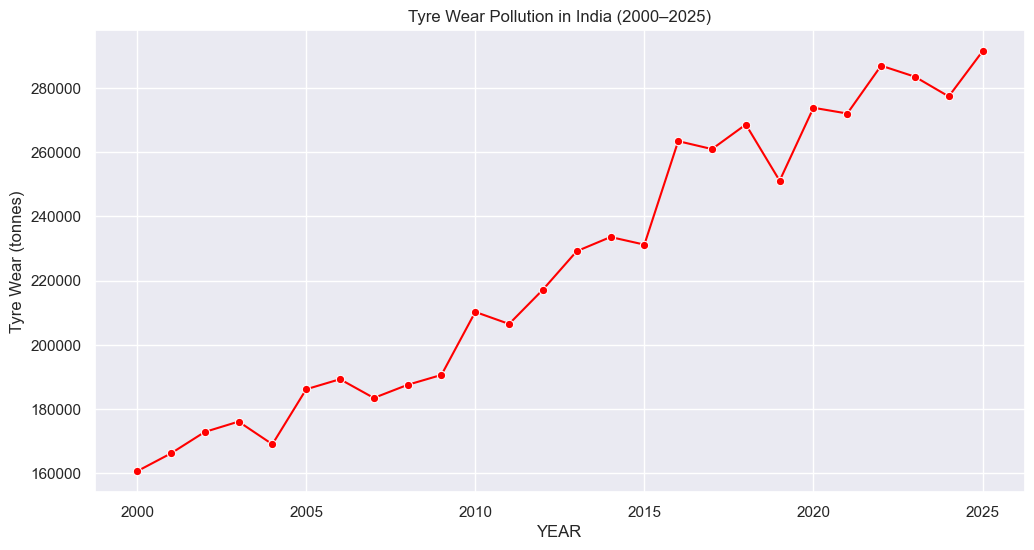

In [9]:
# Plot tyre wear
plt.figure(figsize=(12,6))
sns.lineplot(data=national, x="YEAR", y="Tyre_Wear_Tonnes", marker="o", color="red")
plt.title("Tyre Wear Pollution in India (2000–2025)")
plt.ylabel("Tyre Wear (tonnes)")
plt.show()

C:\Users\logis\AppData\Local\Temp\ipykernel_22464\1407544160.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_2025, x="Tyre_Wear_Tonnes", y="State", palette="Reds_r")


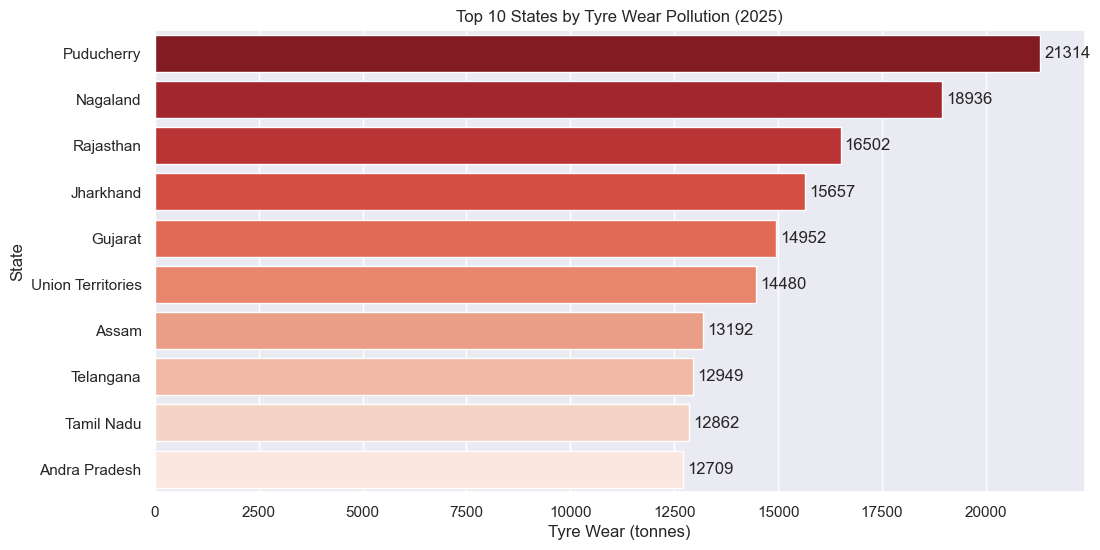

In [10]:
# Top States by Tyre Wear in 2025

df_2025 = df[df["YEAR"] == 2025].groupby("State").agg({
    "Tyre_Wear_Tonnes":"sum",
    "Tyre_microplastics_to_air_tonnes":"sum",
    "Tyre_microplastics_to_water_tonnes":"sum"
}).reset_index().sort_values("Tyre_Wear_Tonnes", ascending=False).head(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_2025, x="Tyre_Wear_Tonnes", y="State", palette="Reds_r")

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)

plt.title("Top 10 States by Tyre Wear Pollution (2025)")
plt.xlabel("Tyre Wear (tonnes)")
plt.ylabel("State")
plt.show()

C:\Users\logis\AppData\Local\Temp\ipykernel_22464\4033167639.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=vc_2025, x="Tyre_Wear_Tonnes", y="Vehicle_Class", palette="Reds_r")


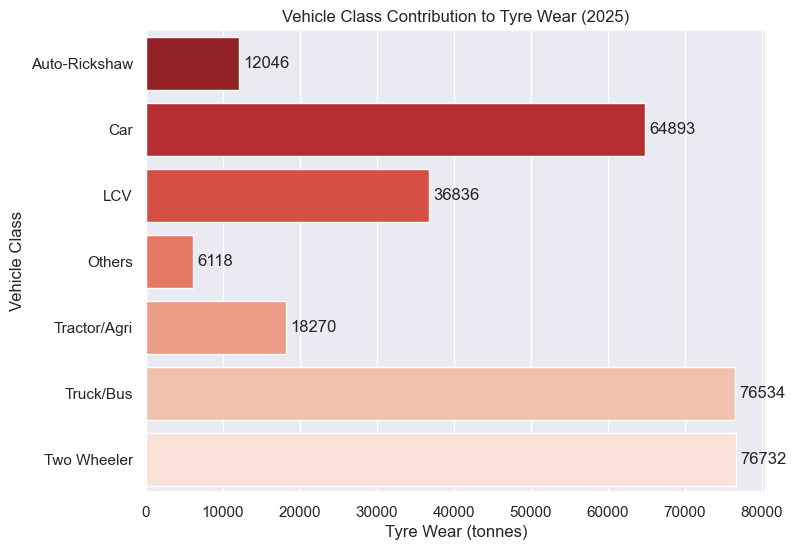

In [11]:
# Vehicle Class Contribution (2025)

vc_2025 = df[df["YEAR"] == 2025].groupby("Vehicle_Class")["Tyre_Wear_Tonnes"].sum().reset_index()

plt.figure(figsize=(8,6))
ax = sns.barplot(data=vc_2025, x="Tyre_Wear_Tonnes", y="Vehicle_Class", palette="Reds_r")

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)

plt.title("Vehicle Class Contribution to Tyre Wear (2025)")
plt.xlabel("Tyre Wear (tonnes)")
plt.ylabel("Vehicle Class")
plt.show()

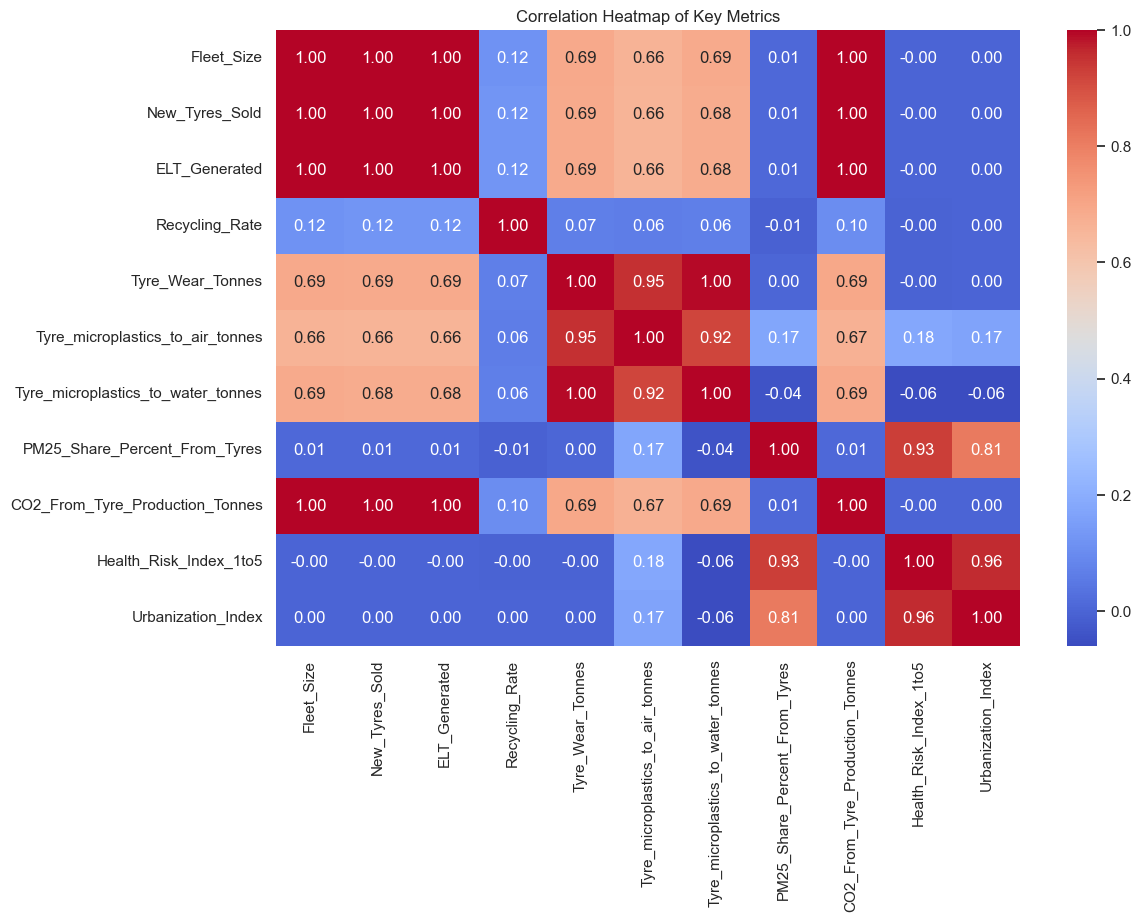

In [12]:
# Correlation Heatmap

corr = df[[
    "Fleet_Size","New_Tyres_Sold","ELT_Generated",
    "Recycling_Rate","Tyre_Wear_Tonnes",
    "Tyre_microplastics_to_air_tonnes","Tyre_microplastics_to_water_tonnes",
    "PM25_Share_Percent_From_Tyres","CO2_From_Tyre_Production_Tonnes",
    "Health_Risk_Index_1to5","Urbanization_Index"
]].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap of Key Metrics")
plt.show()

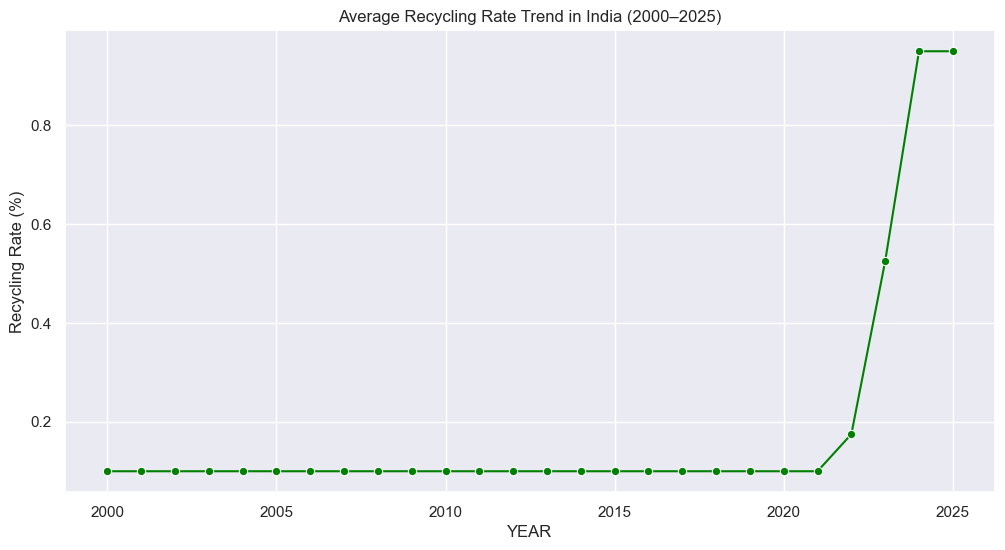

In [13]:
# Recycling Rate Trend (2000–2025)

recycling = df.groupby("YEAR")["Recycling_Rate"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=recycling, x="YEAR", y="Recycling_Rate", marker="o", color="green")
    
plt.title("Average Recycling Rate Trend in India (2000–2025)")
plt.ylabel("Recycling Rate (%)")
plt.show()

In [14]:
### Time Series Forecasting models

# Forecasting Tyre Pollution (2000–2035)

from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression

In [15]:
# Aggregate National Time Series

national = df.groupby("YEAR").agg({
    "Tyre_Wear_Tonnes":"sum",
    "Tyre_microplastics_to_air_tonnes":"sum",
    "Tyre_microplastics_to_water_tonnes":"sum"
}).reset_index()

# Total microplastics (air + water)
national["Total_Microplastics"] = (
    national["Tyre_microplastics_to_air_tonnes"] +
    national["Tyre_microplastics_to_water_tonnes"]
)


In [16]:
# Forecast Function

import warnings
warnings.filterwarnings("ignore")

def forecast_series(series, steps=10, label=""):
    """Try ARIMA(1,1,1). If fails, fallback to linear regression."""
    
    y = series.values
    years = series.index
    
    try:
        # Fit ARIMA
        model = ARIMA(y, order=(1,1,1))
        res = model.fit()
        forecast = res.get_forecast(steps=steps)
        mean = forecast.predicted_mean
        ci = forecast.conf_int()
        lower, upper = ci.iloc[:,0], ci.iloc[:,1]
        method = "ARIMA(1,1,1)"
    except:
        # Fallback: Linear Regression
        X = years.values.reshape(-1,1)
        lr = LinearRegression().fit(X, y)
        future_years = np.arange(years[-1]+1, years[-1]+1+steps).reshape(-1,1)
        mean = lr.predict(future_years)
        # Simple ±10% band
        lower, upper = mean*0.9, mean*1.1
        method = "Linear Regression"
    
    future_index = np.arange(years[-1]+1, years[-1]+1+steps)
    return pd.DataFrame({
        "YEAR": future_index,
        f"{label}_forecast": mean,
        f"{label}_lower": lower,
        f"{label}_upper": upper,
        "Method": method
    })

# Run Forecasts

tyre_forecast = forecast_series(
    national.set_index("YEAR")["Tyre_Wear_Tonnes"],
    steps=10, label="TyreWear"
)

micro_forecast = forecast_series(
    national.set_index("YEAR")["Total_Microplastics"],
    steps=10, label="Microplastics"
)


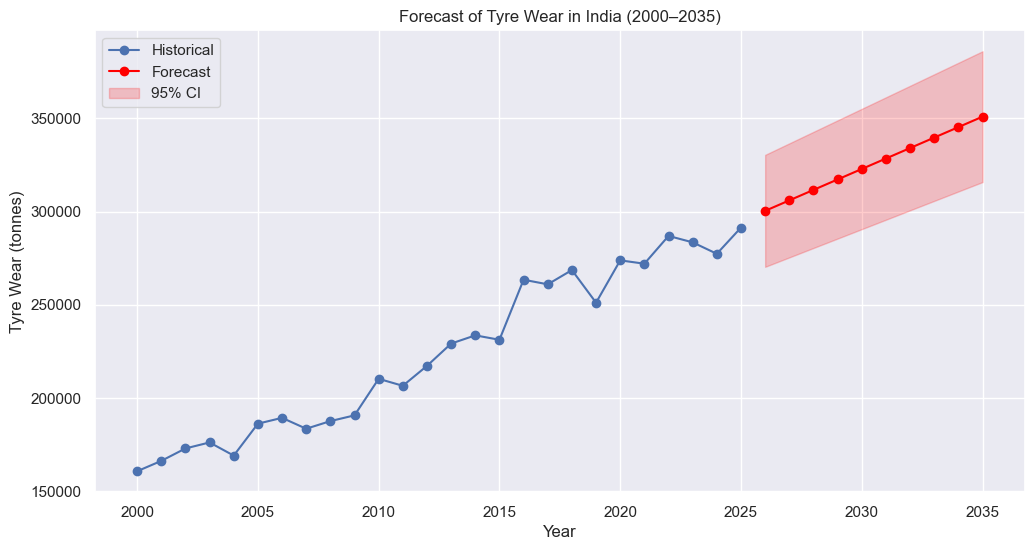

In [17]:
# Plot Tyre Wear Forecast

plt.figure(figsize=(12,6))
plt.plot(national["YEAR"], national["Tyre_Wear_Tonnes"], label="Historical", marker="o")
plt.plot(tyre_forecast["YEAR"], tyre_forecast["TyreWear_forecast"], label="Forecast", marker="o", color="red")
plt.fill_between(tyre_forecast["YEAR"],
                 tyre_forecast["TyreWear_lower"],
                 tyre_forecast["TyreWear_upper"],
                 color="red", alpha=0.2, label="95% CI")
plt.title("Forecast of Tyre Wear in India (2000–2035)")
plt.xlabel("Year")
plt.ylabel("Tyre Wear (tonnes)")
plt.legend()
plt.show()

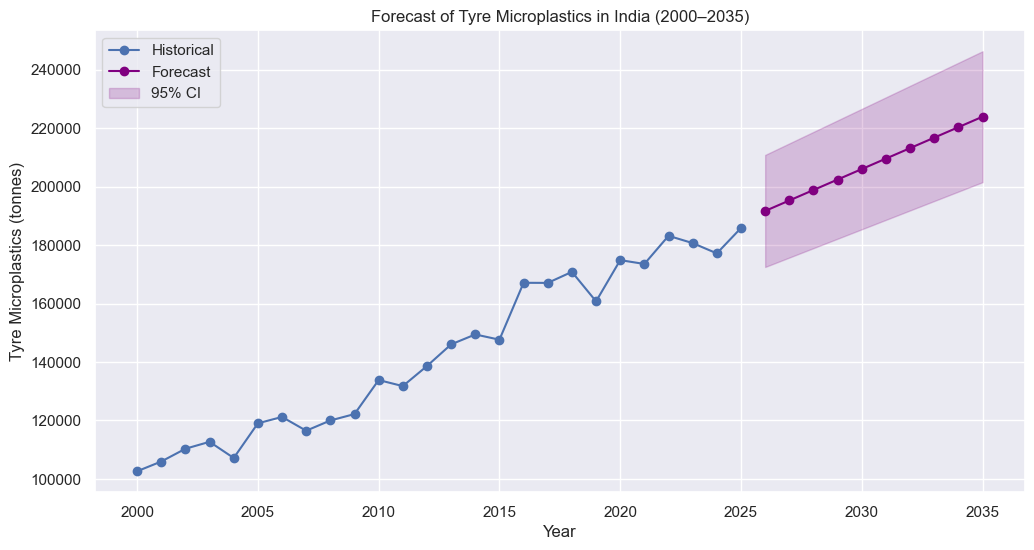

In [18]:
# Plot Microplastics Forecast

plt.figure(figsize=(12,6))
plt.plot(national["YEAR"], national["Total_Microplastics"], label="Historical", marker="o")
plt.plot(micro_forecast["YEAR"], micro_forecast["Microplastics_forecast"], label="Forecast", marker="o", color="purple")
plt.fill_between(micro_forecast["YEAR"],
                 micro_forecast["Microplastics_lower"],
                 micro_forecast["Microplastics_upper"],
                 color="purple", alpha=0.2, label="95% CI")
plt.title("Forecast of Tyre Microplastics in India (2000–2035)")
plt.xlabel("Year")
plt.ylabel("Tyre Microplastics (tonnes)")
plt.legend()
plt.show()


In [19]:
# Combine Results into One Table

forecast_table = tyre_forecast.merge(micro_forecast, on="YEAR")
forecast_table

,YEAR,TyreWear_forecast,TyreWear_lower,TyreWear_upper,Method_x,Microplastics_forecast,Microplastics_lower,Microplastics_upper,Method_y
0,2026,300408.091065,270367.281958,330448.900171,Linear Regression,191657.272634,172491.545370,210822.999897,Linear Regression
1,2027,306023.262155,275420.935939,336625.588370,Linear Regression,195239.424131,175715.481718,214763.366544,Linear Regression
2,2028,311638.433245,280474.589921,342802.276570,Linear Regression,198821.575628,178939.418065,218703.733191,Linear Regression
3,2029,317253.604335,285528.243902,348978.964769,Linear Regression,202403.727125,182163.354413,222644.099838,Linear Regression
4,2030,322868.775426,290581.897883,355155.652968,Linear Regression,205985.878622,185387.290760,226584.466484,Linear Regression
5,2031,328483.946516,295635.551864,361332.341167,Linear Regression,209568.030119,188611.227107,230524.833131,Linear Regression
6,2032,334099.117606,300689.205846,367509.029367,Linear Regression,213150.181616,191835.163455,234465.199778,Linear Regression
7,2033,339714.288696,305742.859827,373685.717566,Linear Regression,216732.333114,195059.099802,238405.566425,Linear Regression
8,2034,345329.459787,310796.513808,379862.405765,Linear Regression,220314.484611,198283.036150,242345.933072,Linear Regression
9,2035,350944.630877,315850.167789,386039.093965,Linear Regression,223896.636108,201506.972497,246286.299718,Linear Regression


Train rows: 5292 Test rows: 1260
== LinearRegression ==
Train MAE: 0.0149 | Test MAE: 0.0148
Train RMSE: 0.0227 | Test RMSE: 0.0216
Train R2: 0.9974 | Test R2: 0.9977

== RidgeCV (alpha=0.3162) ==
Train MAE: 0.0149 | Test MAE: 0.0146
Train RMSE: 0.0227 | Test RMSE: 0.0215
Train R2: 0.9974 | Test R2: 0.9977

== LassoCV (alpha=4.2728e-04) ==
Train MAE: 0.0195 | Test MAE: 0.0193
Train RMSE: 0.0262 | Test RMSE: 0.0257
Train R2: 0.9965 | Test R2: 0.9967

== RandomForest ==
Train MAE: 0.0031 | Test MAE: 0.0048
Train RMSE: 0.0044 | Test RMSE: 0.0071
Train R2: 0.9999 | Test R2: 0.9997

== XGBoost ==
Train MAE: 0.0035 | Test MAE: 0.0049
Train RMSE: 0.0045 | Test RMSE: 0.0081
Train R2: 0.9999 | Test R2: 0.9997

Model comparison (by Test MAE):
RandomForest: Test MAE = 0.0048
XGBoost: Test MAE = 0.0049
RidgeCV: Test MAE = 0.0146
LinearRegression: Test MAE = 0.0148
LassoCV: Test MAE = 0.0193


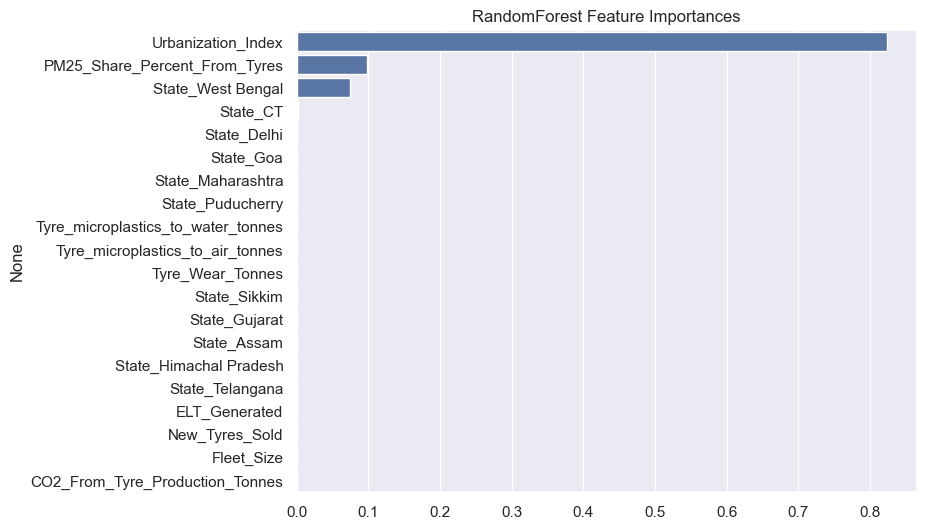

,linear_coef,ridge_coef,lasso_coef
feature,,,
Urbanization_Index,0.249259,0.249521,0.249638
State_West Bengal,0.229952,0.227630,0.223577
PM25_Share_Percent_From_Tyres,0.194695,0.195107,0.196899
Tyre_Wear_Tonnes,-0.102048,-0.084519,-0.000000
State_CT,0.073863,0.075089,0.075365
Tyre_microplastics_to_water_tonnes,0.076414,0.062723,-0.001338
State_Delhi,0.055212,0.054070,0.048794
State_Meghalaya,0.037382,0.036419,0.030990
State_Karnataka,0.037110,0.036203,0.030564


Saved best pipeline as health_risk_model_pipeline.pkl (best: RandomForest)


In [20]:
# Chat GPT Code:
# Regression pipeline:
# Predict Health_Risk_Index_1to5

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib
import warnings
warnings.filterwarnings("ignore")

# 0) Target & predictors
target = "Health_Risk_Index_1to5"
num_features = [
    "Fleet_Size", "New_Tyres_Sold", "ELT_Generated",
    "Recycling_Rate", "Tyre_Wear_Tonnes",
    "Tyre_microplastics_to_air_tonnes", "Tyre_microplastics_to_water_tonnes",
    "PM25_Share_Percent_From_Tyres", "CO2_From_Tyre_Production_Tonnes",
    "Urbanization_Index"
]
cat_features = ["State", "Vehicle_Class"]

# 1) Clean data
data = df.copy()
data = data.dropna(subset=[target])
for c in num_features:
    data[c] = pd.to_numeric(data[c], errors="coerce")

# 2) Train-test split (time-based)
train = data[data["YEAR"] <= 2020].copy()
test  = data[data["YEAR"] > 2020].copy()
print("Train rows:", train.shape[0], "Test rows:", test.shape[0])

# 3) Preprocessing
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))  # ✅ updated
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, num_features),
    ("cat", categorical_transformer, cat_features)
])

# 4) Evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test, name="model"):
    preds_train = model.predict(X_train)
    preds_test = model.predict(X_test)
    metrics = {}
    metrics["train_mae"] = mean_absolute_error(y_train, preds_train)
    metrics["test_mae"] = mean_absolute_error(y_test, preds_test)
    # ✅ compute RMSE manually to avoid 'squared' error
    metrics["train_rmse"] = np.sqrt(mean_squared_error(y_train, preds_train))
    metrics["test_rmse"] = np.sqrt(mean_squared_error(y_test, preds_test))
    metrics["train_r2"] = r2_score(y_train, preds_train)
    metrics["test_r2"] = r2_score(y_test, preds_test)
    print(f"== {name} ==")
    print(f"Train MAE: {metrics['train_mae']:.4f} | Test MAE: {metrics['test_mae']:.4f}")
    print(f"Train RMSE: {metrics['train_rmse']:.4f} | Test RMSE: {metrics['test_rmse']:.4f}")
    print(f"Train R2: {metrics['train_r2']:.4f} | Test R2: {metrics['test_r2']:.4f}\n")
    return metrics, preds_test

# 5) Prepare train/test
X_train = train[num_features + cat_features]
y_train = train[target]
X_test  = test[num_features + cat_features]
y_test  = test[target]

preprocessor.fit(X_train)
X_train_prep = preprocessor.transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

# 6) Models
results = {}

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_prep, y_train)
results["LinearRegression"], lr_preds = evaluate_model(lr, X_train_prep, y_train, X_test_prep, y_test, "LinearRegression")

# Ridge
alphas = np.logspace(-3, 3, 13)
ridge = RidgeCV(alphas=alphas, scoring="neg_mean_absolute_error", cv=5)
ridge.fit(X_train_prep, y_train)
results["RidgeCV"], ridge_preds = evaluate_model(ridge, X_train_prep, y_train, X_test_prep, y_test, f"RidgeCV (alpha={ridge.alpha_:.4f})")

# Lasso
lasso = LassoCV(alphas=None, cv=5, max_iter=5000)
lasso.fit(X_train_prep, y_train)
results["LassoCV"], lasso_preds = evaluate_model(lasso, X_train_prep, y_train, X_test_prep, y_test, f"LassoCV (alpha={lasso.alpha_:.4e})")

# Random Forest
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train_prep, y_train)
results["RandomForest"], rf_preds = evaluate_model(rf, X_train_prep, y_train, X_test_prep, y_test, "RandomForest")

# XGBoost (optional)
try:
    from xgboost import XGBRegressor
    xgb = XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.05, random_state=42, n_jobs=-1, verbosity=0)
    xgb.fit(X_train_prep, y_train)
    results["XGBoost"], xgb_preds = evaluate_model(xgb, X_train_prep, y_train, X_test_prep, y_test, "XGBoost")
    use_xgb = True
except:
    print("XGBoost not installed or failed. Run `pip install xgboost` if you need it.")
    use_xgb = False

# 7) Compare models
compare = sorted([(k, v['test_mae']) for k, v in results.items()], key=lambda x: x[1])
print("Model comparison (by Test MAE):")
for name, mae in compare:
    print(f"{name}: Test MAE = {mae:.4f}")

# 8) Feature importance
ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]
cat_names = list(ohe.get_feature_names_out(cat_features))
all_feature_names = num_features + cat_names

if "RandomForest" in results:
    importances = rf.feature_importances_
    fi = pd.Series(importances, index=all_feature_names).sort_values(ascending=False).head(20)
    plt.figure(figsize=(8,6))
    sns.barplot(x=fi.values, y=fi.index)
    plt.title("RandomForest Feature Importances")
    plt.show()

# Coefficients
coef_df = pd.DataFrame({
    "feature": all_feature_names,
    "linear_coef": lr.coef_,
    "ridge_coef": ridge.coef_,
    "lasso_coef": lasso.coef_
}).set_index("feature")
display(coef_df.sort_values(by="ridge_coef", key=lambda x: x.abs(), ascending=False).head(20))

# 9) Save best model
best_model_name = compare[0][0]
if best_model_name == "LinearRegression":
    best_model = lr
elif best_model_name.startswith("Ridge"):
    best_model = ridge
elif best_model_name.startswith("Lasso"):
    best_model = lasso
elif best_model_name == "RandomForest":
    best_model = rf
elif best_model_name == "XGBoost" and use_xgb:
    best_model = xgb
else:
    best_model = rf

full_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", best_model)
])
full_pipeline.fit(data[num_features + cat_features], data[target])
joblib.dump(full_pipeline, "health_risk_model_pipeline.pkl")
print(f"Saved best pipeline as health_risk_model_pipeline.pkl (best: {best_model_name})")


In [21]:
# Urbanization effect on pollution 

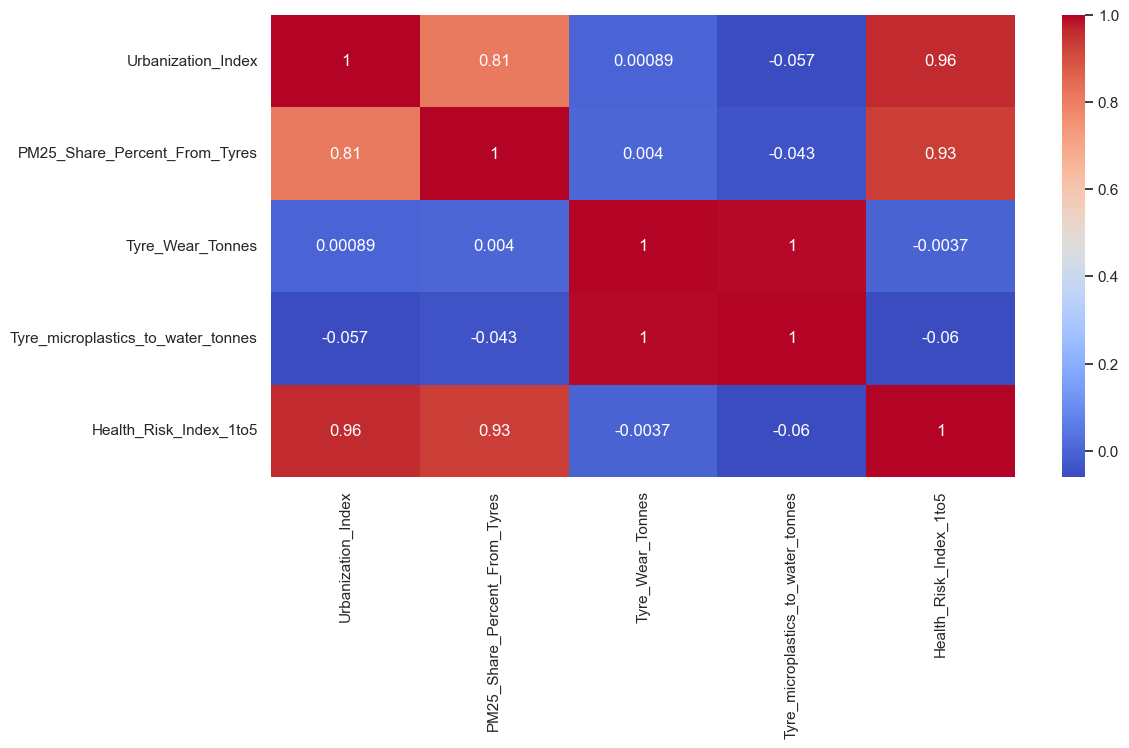

Coefficient: 6.934059856074536
Intercept: 2.0403243046431205
R²: 0.6586545608531491


In [22]:
# correlation heatmap
sns.heatmap(df[['Urbanization_Index','PM25_Share_Percent_From_Tyres',
                'Tyre_Wear_Tonnes','Tyre_microplastics_to_water_tonnes',
                'Health_Risk_Index_1to5']].corr(), annot=True, cmap='coolwarm')
plt.show()

# Linear Regression: Urbanization -> PM2.5
X = df[['Urbanization_Index']]
y = df['PM25_Share_Percent_From_Tyres']

model = LinearRegression()
model.fit(X, y)

print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R²:", model.score(X, y))

In [23]:
X = df[['Urbanization_Index', 'PM25_Share_Percent_From_Tyres',
        'Tyre_Wear_Tonnes', 'Tyre_microplastics_to_water_tonnes']]
y = df['Health_Risk_Index_1to5']

model = LinearRegression()
model.fit(X, y)

for col, coef in zip(X.columns, model.coef_):
    print(f"{col}: {coef:.4f}")
print("R²:", model.score(X, y))


Urbanization_Index: 2.6310
PM25_Share_Percent_From_Tyres: 0.2305
Tyre_Wear_Tonnes: 0.0001
Tyre_microplastics_to_water_tonnes: -0.0001
R²: 0.988621969239212


In [24]:
# Pollution Analysis by Year

# Define pollution-related columns
pollution_cols = [
    "Tyre_Wear_Tonnes",
    "Tyre_microplastics_to_air_tonnes",
    "Tyre_microplastics_to_water_tonnes",
    "CO2_From_Tyre_Production_Tonnes"
]

# Group by year and sum pollution indicators
yearly_pollution = df.groupby("YEAR")[pollution_cols].sum()

# Add total pollution index
yearly_pollution["Total_Pollution"] = yearly_pollution.sum(axis=1)

# Find the year with maximum pollution
max_year = yearly_pollution["Total_Pollution"].idxmax()
max_value = yearly_pollution["Total_Pollution"].max()

print(f" Year with highest pollution: {max_year} ({max_value:,.2f})")

 Year with highest pollution: 2024 (19,077,640.11)


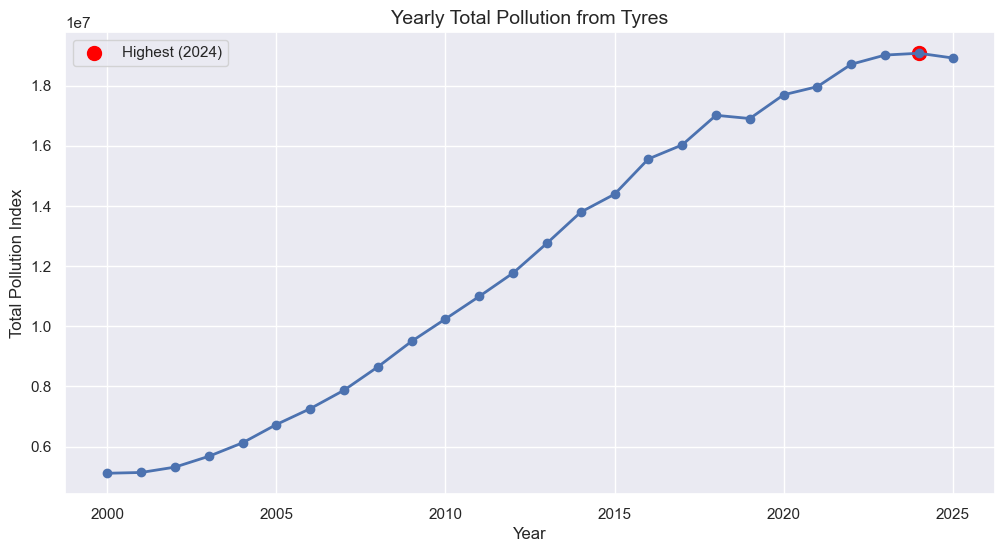

In [25]:
# Plotting Pollution Trends

plt.figure(figsize=(12,6))
plt.plot(yearly_pollution.index, yearly_pollution["Total_Pollution"], marker="o", linewidth=2)
plt.title("Yearly Total Pollution from Tyres", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Pollution Index")
plt.grid(True)

# Highlight the max year
plt.scatter(max_year, max_value, color="red", s=100, label=f"Highest ({max_year})")
plt.legend()
plt.show()


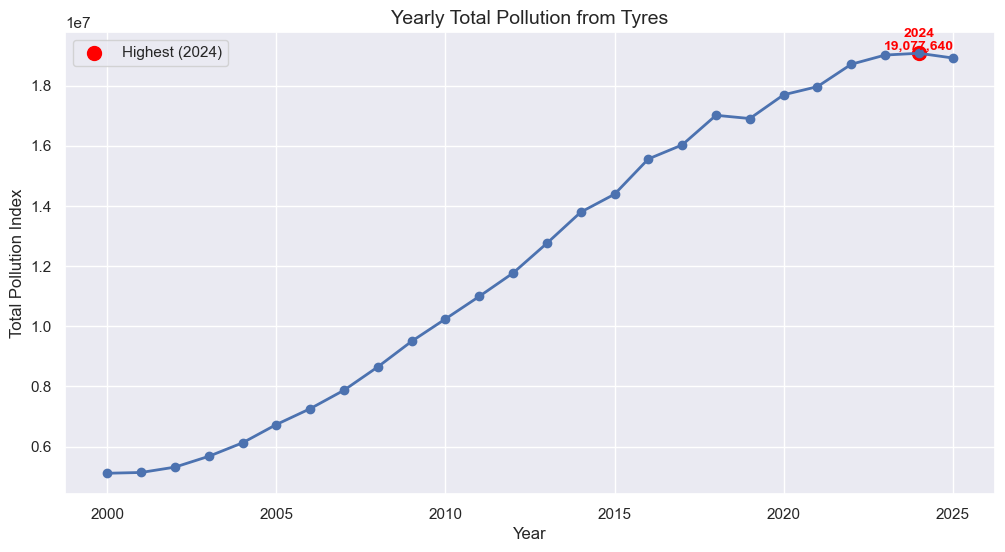

In [26]:
plt.figure(figsize=(12,6))
plt.plot(yearly_pollution.index, yearly_pollution["Total_Pollution"], marker="o", linewidth=2)
plt.title("Yearly Total Pollution from Tyres", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Pollution Index")
plt.grid(True)

# Highlight the max year
plt.scatter(max_year, max_value, color="red", s=100, label=f"Highest ({max_year})")

# Add text label above the highest point
plt.text(max_year, max_value, 
         f"{max_year}\n{max_value:,.0f}", 
         ha="center", va="bottom", fontsize=10, color="red", fontweight="bold")

plt.legend()
plt.show()
